## Convolutional Neural Network

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from IPython.display import Image
# 이미지 로드해주는 라이브러리

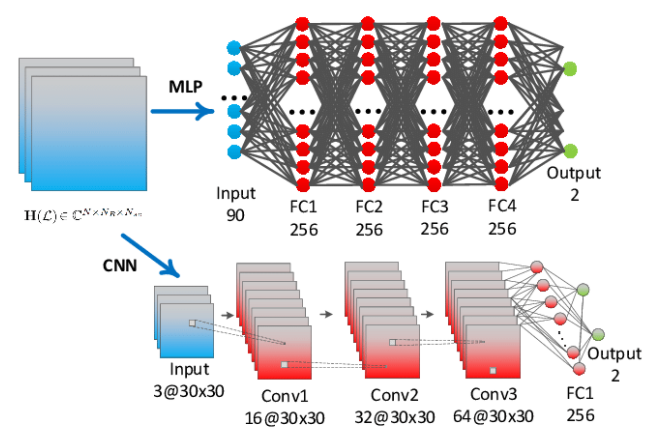

In [3]:
Image('/content/drive/MyDrive/CDS2(2022-2)/img/02/mlp_conv.png')

→ 이미지를 픽셀 단위로 학습했었는데, 흑백에서 컬러, 그리고 고차원이 될수록 학습이 어렵다. 더 좋은 방법이 없을까? ANN → CNN

In [4]:
import numpy as np
import pandas as pd
import os

* Convoltion

: 하나의 픽셀이 아니라 주변을 바라보면서 학습할 수 있게 해보자. → 마치 사람 처럼.

In [5]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D
# Conv2D : 2-D image, MaxPooling2D : pooling
from tensorflow.keras.models import Model

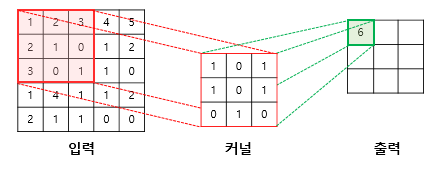

In [6]:
Image('/content/drive/MyDrive/CDS2(2022-2)/img/02/Conv.png')

→ 위와 같이 이미지가 입력으로 들어오면 특정 사이즈의 커널로 입력을 받고 출력을 하게 된다.

* conv2D() : 배치를 제외하고 3차원(gray scale 인 경우 1)으로 입력해주어야한다.

In [7]:
input_tensor = Input(shape=(28, 28, 1))
# 3-dimension
x = Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu')(input_tensor)
# output channel : 32
# padding : 뒤에서.
print('x type:', type(x), 'x:', x)

x type: <class 'keras.engine.keras_tensor.KerasTensor'> x: KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 32), dtype=tf.float32, name=None), name='conv2d/Relu:0', description="created by layer 'conv2d'")


* padding

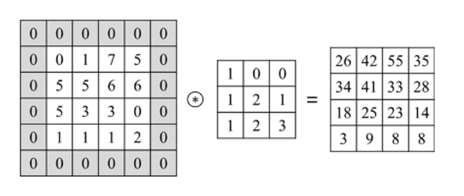

In [8]:
Image('/content/drive/MyDrive/CDS2(2022-2)/img/02/padding.png')

→ conv연산을 하면, 이미지의 크기가 줄어드는데 곱할때 양 끝을 특정 값(위에서는 0)으로 채워넣고 하면 사이즈가 줄지 않는다. 위의 코드에서 padding=same은 줄어들지 않게 알아서 적절하게 padding을 해주는 것을 의미한다. 

* pooling

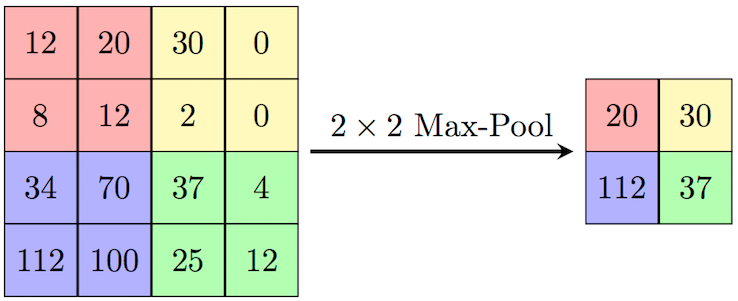

In [9]:
Image('/content/drive/MyDrive/CDS2(2022-2)/img/02/pool.png')

→ 결국 우리가 지금 하는 것은 "이미지를 얼마나 잘 학습할 수 있는 feature로 추출하는 가"이다. 따라서 위와 같이 4개의 구역에서 가장 큰 값을 뽑거나 하는 등(평균, 중앙값)의 pooling 작업도 해준다. 머신러닝에서 평균을 feature로 만들어주는 작업 등.

In [13]:
input_tensor = Input(shape=(28, 28, 1))
x = Conv2D(filters=16, kernel_size=3, strides=1, padding='same', activation='relu')(input_tensor)
x = MaxPooling2D(2, 2)(x)
# output 1/2
print(x)

KerasTensor(type_spec=TensorSpec(shape=(None, 14, 14, 16), dtype=tf.float32, name=None), name='max_pooling2d_3/MaxPool:0', description="created by layer 'max_pooling2d_3'")


* model 

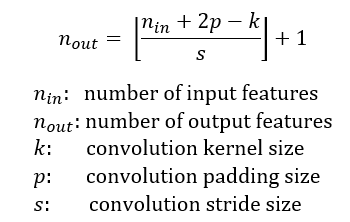

In [ ]:
Image('/content/drive/MyDrive/CDS2(2022-2)/img/02/conv_out.png')

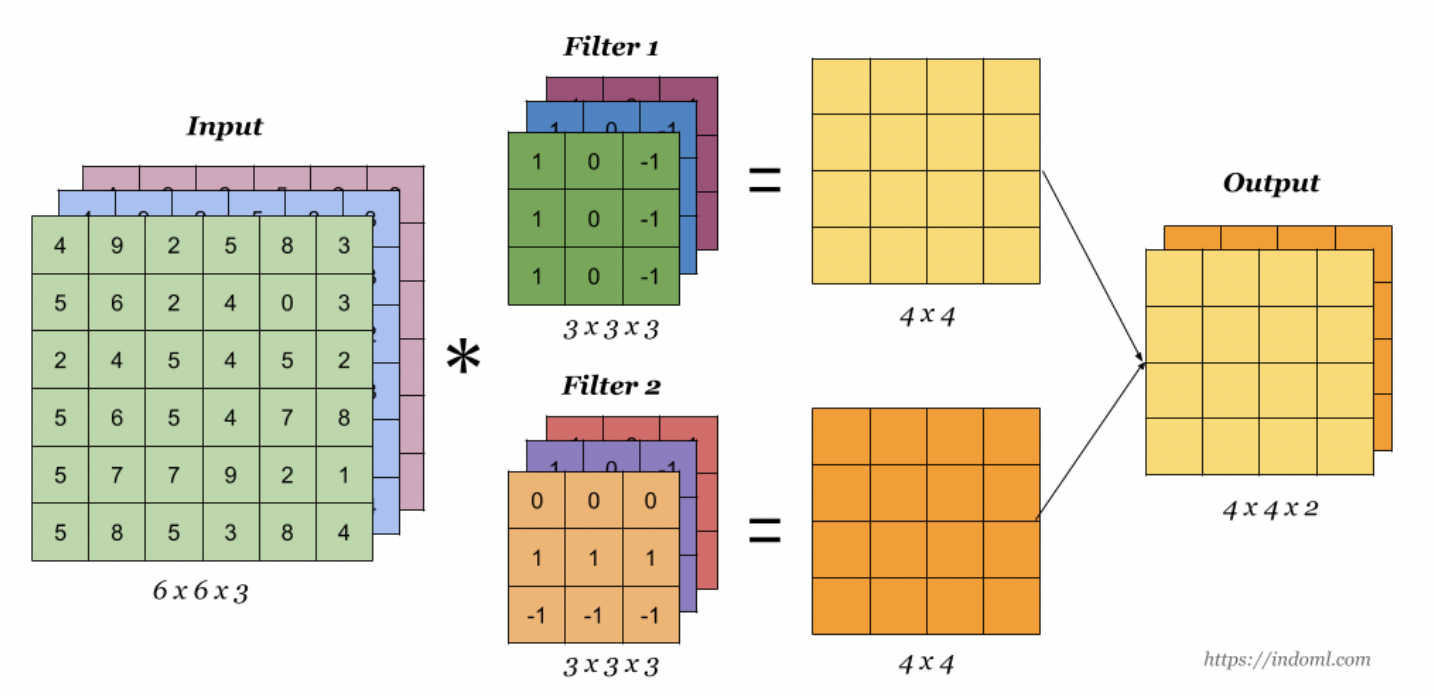

In [ ]:
Image('/content/drive/MyDrive/CDS2(2022-2)/img/02/ft.png')

In [ ]:
32 * (3 * 3) + 32

320

In [ ]:
64 * 32 * (3 * 3) + 64

18496

*편하게 기억하는 방법<br>
1) Kernel Size, Kernel : 픽셀을 격자 단위로(ex. 3x3) 입력 받을 파라미터의 크기이다.<br>
2) Filter : 위의 kernel을 input에 맞게 연산하도록 하는 묶음.

In [ ]:
input_tensor = Input(shape=(28, 28, 1))
x = Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu')(input_tensor)
x = Conv2D(filters=64, kernel_size=3, activation='relu')(x)
x = MaxPooling2D(2)(x)

model = Model(inputs=input_tensor, outputs=x)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
Total params: 18,816
Trainable params: 18,816
Non-trainable params: 0
_________________________________________________________________


* Dense connection

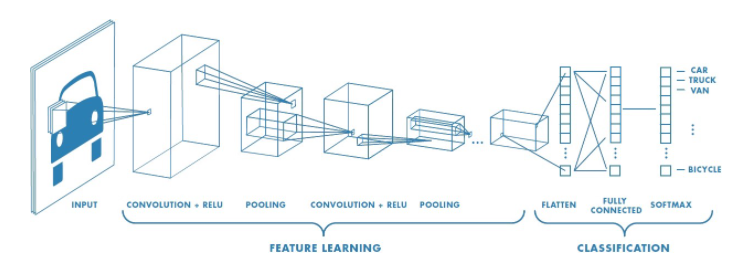

In [ ]:
Image('/content/drive/MyDrive/CDS2(2022-2)/img/02/f_e.png')

In [ ]:
from tensorflow.keras.layers import Dense, Flatten

In [ ]:
input_tensor = Input(shape=(28, 28, 1))
x = Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu')(input_tensor)
x = Conv2D(filters=64, kernel_size=3, activation='relu')(x)
x = MaxPooling2D(2)(x)





x = Flatten()(x)
x = Dense(100, activation='relu')(x)
output = Dense(10, activation='softmax')(x)

In [ ]:
model = Model(inputs=input_tensor, outputs=output)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 conv2d_5 (Conv2D)           (None, 26, 26, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 10816)             0         
                                                                 
 dense (Dense)               (None, 100)               1081700   
                                                           

In [ ]:
3*3*32 + 32

320

In [ ]:
3*3*32*64 + 64 

18496

In [ ]:
from tensorflow.keras.datasets import fashion_mnist
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

* 앞서 구현한 scaling, one-hot encoding, train-valid dataset function

In [ ]:
def gpd(images, labels):

    images = np.array(images/255.0, dtype=np.float32)
    labels = np.array(labels, dtype=np.float32)
    
    return images, labels

# 0 ~ 1사이값 float32로 변경하는 함수 호출 한 뒤 OHE 적용 
def gpohe(images, labels):
    images, labels = gpd(images, labels)
    # OHE 적용 
    oh_labels = to_categorical(labels)
    return images, oh_labels

# 학습/검증/테스트 데이터 세트에 전처리 및 OHE 적용한 뒤 반환 
def gtvt(train_images, train_labels, test_images, test_labels, valid_size=0.15, random_state=2021):
    # 학습 및 테스트 데이터 세트를  0 ~ 1사이값 float32로 변경 및 OHE 적용. 
    train_images, train_oh_labels = gpohe(train_images, train_labels)
    test_images, test_oh_labels = gpohe(test_images, test_labels)
    
    # 학습 데이터를 검증 데이터 세트로 다시 분리
    tr_images, val_images, tr_oh_labels, val_oh_labels = train_test_split(train_images, train_oh_labels, test_size=valid_size, random_state=random_state)
    
    return (tr_images, tr_oh_labels), (val_images, val_oh_labels), (test_images, test_oh_labels ) 

# Fashion MNIST 데이터 재 로딩 및 전처리 적용하여 학습/검증/데이터 세트 생성. 

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
print(train_images.shape, train_labels.shape, test_images.shape, test_labels.shape)
(tr_images, tr_oh_labels), (val_images, val_oh_labels), (test_images, test_oh_labels) = \
    gtvt(train_images, train_labels, test_images, test_labels, valid_size=0.15, random_state=2021)
print(tr_images.shape, tr_oh_labels.shape, val_images.shape, val_oh_labels.shape, test_images.shape, test_labels.shape)

4431872/4422102 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
(51000, 28, 28) (51000, 10) (9000, 28, 28) (9000, 10) (10000, 28, 28) (10000,)


In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy

In [ ]:
model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
128*399

51072

In [ ]:
history = model.fit(x=tr_images, y=tr_oh_labels, batch_size=128, epochs=20, validation_data=(val_images, val_oh_labels))

Epoch 1/20
399/399 [==============================] - 15s 8ms/step - loss: 0.4385 - accuracy: 0.8433 - val_loss: 0.3178 - val_accuracy: 0.8884
Epoch 2/20
399/399 [==============================] - 3s 7ms/step - loss: 0.2701 - accuracy: 0.9044 - val_loss: 0.2777 - val_accuracy: 0.8980
Epoch 3/20
399/399 [==============================] - 3s 7ms/step - loss: 0.2218 - accuracy: 0.9199 - val_loss: 0.2507 - val_accuracy: 0.9096
Epoch 4/20
399/399 [==============================] - 3s 7ms/step - loss: 0.1838 - accuracy: 0.9330 - val_loss: 0.2383 - val_accuracy: 0.9160
Epoch 5/20
399/399 [==============================] - 3s 7ms/step - loss: 0.1554 - accuracy: 0.9434 - val_loss: 0.2158 - val_accuracy: 0.9210
Epoch 6/20
399/399 [==============================] - 3s 7ms/step - loss: 0.1270 - accuracy: 0.9539 - val_loss: 0.2269 - val_accuracy: 0.9209
Epoch 7/20
399/399 [==============================] - 3s 7ms/step - loss: 0.1040 - accuracy: 0.9613 - val_loss: 0.2573 - val_accuracy: 0.9174
Epoch

* model 성능 평가

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def show_history(history):
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='valid')
    plt.legend()

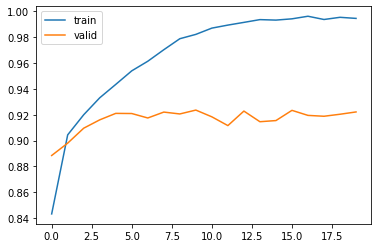

In [ ]:
show_history(history)

* test data로 성능 검증

In [ ]:
model.evaluate(test_images, test_oh_labels, batch_size=128, verbose=1)

79/79 [==============================] - 0s 5ms/step - loss: 0.4620 - accuracy: 0.9212


[0.4619954526424408, 0.9211999773979187]

* Drop out : 파라미터 수 감소, 앙상블 효과

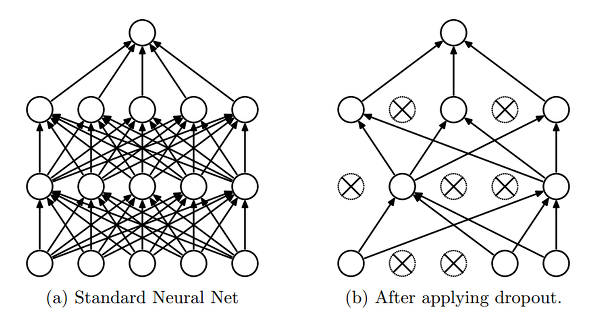

In [ ]:
Image('/content/drive/MyDrive/CDS2(2022-2)/img/02/dropout.png')

In [ ]:
from tensorflow.keras.layers import Dense, Flatten, Dropout

input_tensor = Input(shape=(28, 28, 1))
x = Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu')(input_tensor)
x = Conv2D(filters=64, kernel_size=3, activation='relu')(x)
x = MaxPooling2D(2)(x)


x = Flatten()(x)
x = Dropout(rate=0.5)(x)
x = Dense(100, activation='relu')(x)
output = Dense(10, activation='softmax')(x)
model = Model(inputs=input_tensor, outputs=output)
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 conv2d_7 (Conv2D)           (None, 26, 26, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 10816)             0         
                                                                 
 dropout (Dropout)           (None, 10816)             0         
                                                           

실행 구간 : 아래 셀까지 shift+enter

In [ ]:
model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x=tr_images, y=tr_oh_labels, batch_size=128, epochs=20, validation_data=(val_images, val_oh_labels))

Epoch 1/20
399/399 [==============================] - 4s 9ms/step - loss: 0.4550 - accuracy: 0.8383 - val_loss: 0.3423 - val_accuracy: 0.8757
Epoch 2/20
399/399 [==============================] - 3s 9ms/step - loss: 0.2958 - accuracy: 0.8935 - val_loss: 0.2684 - val_accuracy: 0.9029
Epoch 3/20
399/399 [==============================] - 3s 8ms/step - loss: 0.2479 - accuracy: 0.9088 - val_loss: 0.2488 - val_accuracy: 0.9084
Epoch 4/20
399/399 [==============================] - 3s 8ms/step - loss: 0.2211 - accuracy: 0.9183 - val_loss: 0.2342 - val_accuracy: 0.9144
Epoch 5/20
399/399 [==============================] - 3s 8ms/step - loss: 0.1953 - accuracy: 0.9285 - val_loss: 0.2199 - val_accuracy: 0.9209
Epoch 6/20
399/399 [==============================] - 3s 8ms/step - loss: 0.1760 - accuracy: 0.9336 - val_loss: 0.2161 - val_accuracy: 0.9223
Epoch 7/20
399/399 [==============================] - 3s 8ms/step - loss: 0.1585 - accuracy: 0.9414 - val_loss: 0.2101 - val_accuracy: 0.9240
Epoch 

* model 성능 평가

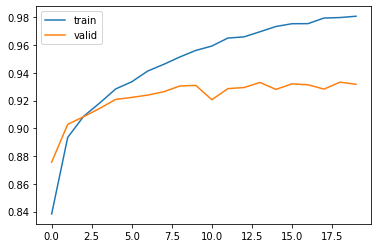

In [ ]:
show_history(history)

* test data 검증

In [ ]:
model.evaluate(test_images, test_oh_labels, batch_size=128, verbose=1)

79/79 [==============================] - 0s 4ms/step - loss: 0.2981 - accuracy: 0.9282


[0.29812589287757874, 0.9282000064849854]

* 특정 이미지를 잘 학습하는 Model 구조가 있지 않을까?